In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [2]:
import plotly.offline as py

In [5]:
from mpl_toolkits.basemap import Basemap


In [7]:
#print (Basemap.supported_projections)

In [8]:
from IPython.display import set_matplotlib_formats

In [9]:
import matplotlib.patches as mpatches

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Read the dataframe
mydata = pd.read_csv('../code/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

In [81]:
mydata.shape

(181691, 135)

In [82]:
mydata.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [83]:
#mydata.summary

In [84]:
mydata.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [85]:
mydata.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
                       ...  
propextent            117626
propextent_txt        117626
propvalue             142702
propcomment   

In [86]:
mydata.shape[0]

181691

In [87]:
#Null value 
100*mydata.isnull().sum()/mydata.shape[0]

eventid                0.000000
iyear                  0.000000
imonth                 0.000000
iday                   0.000000
approxdate            94.914993
extended               0.000000
resolution            98.778145
country                0.000000
country_txt            0.000000
region                 0.000000
region_txt             0.000000
provstate              0.231712
city                   0.238867
latitude               2.507554
longitude              2.508104
specificity            0.003302
vicinity               0.000000
location              69.456385
summary               36.396409
crit1                  0.000000
crit2                  0.000000
crit3                  0.000000
doubtterr              0.000550
alternative           84.032781
alternative_txt       84.032781
multiple               0.000550
success                0.000000
suicide                0.000000
attacktype1            0.000000
attacktype1_txt        0.000000
                        ...    
propexte

In [ ]:
#droping more than 50% Null values attributes

In [17]:
mylist = []
for i in mydata:
    if 100*mydata[i].isnull().sum()/mydata.shape[0] > 50:
        mylist.append(i)


In [18]:
len(mylist)

77

In [19]:
mylist

['approxdate',
 'resolution',
 'location',
 'alternative',
 'alternative_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain2',
 'guncertain3',
 'claimmode',
 'claimmode_txt',
 'claim2',
 'claimmode2',
 'claimmode2_txt',
 'claim3',
 'claimmode3',
 'claimmode3_txt',
 'compclaim',
 'weaptype2',
 'weaptype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype3',
 'weaptype3_txt',
 'weapsubtype3',
 'weapsubtype3_txt',
 'weaptype4',
 'weaptype4_txt',
 'weapsubtype4',
 'weapsubtype4_txt',
 'propextent',
 'propextent_txt',
 'propvalue',
 'propcomment',
 'nhostkid',
 'nhostkidus',
 'nhours',
 'ndays',
 'divert',
 'kidhijcountry',
 'ransom',
 'ra

In [20]:
mydata = mydata.drop(mylist,axis=1)

In [21]:
mydata.shape

(181691, 58)

In [22]:
mydata.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


In [96]:
#mydata.describe()

In [97]:
#Null value 
100*mydata.isnull().sum()/mydata.shape[0]

eventid              0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
extended             0.000000
country              0.000000
country_txt          0.000000
region               0.000000
region_txt           0.000000
provstate            0.231712
city                 0.238867
latitude             2.507554
longitude            2.508104
specificity          0.003302
vicinity             0.000000
summary             36.396409
crit1                0.000000
crit2                0.000000
crit3                0.000000
doubtterr            0.000550
multiple             0.000550
success              0.000000
suicide              0.000000
attacktype1          0.000000
attacktype1_txt      0.000000
targtype1            0.000000
targtype1_txt        0.000000
targsubtype1         5.709144
targsubtype1_txt     5.709144
corp1               23.418882
target1              0.350045
natlty1              0.858050
natlty1_txt          0.858050
gname     

In [9]:
#for i in mydata.columns:
 #   print(mydata[i].describe())
  #  print('')
   # print('-------------------------------')
    #print('')

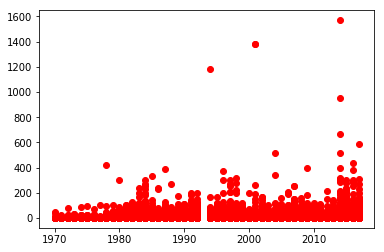

In [98]:
#scatter plot (ro = red dot) using matplot.lib
plt.plot(mydata['iyear'] , mydata['nkill'],'ro')



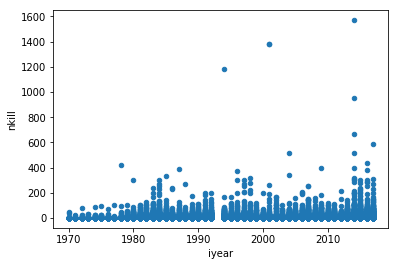

In [11]:
#scatter plot2 using pandas
mydata.plot(kind='scatter' , x= 'iyear' , y= 'nkill')

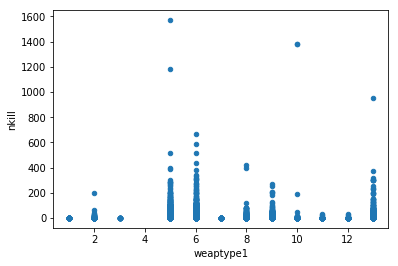

In [12]:
#scatter plot2 using pandas
mydata.plot(kind='scatter' , x= 'weaptype1' , y= 'nkill')

Text(0, 0.5, 'number of killed people')

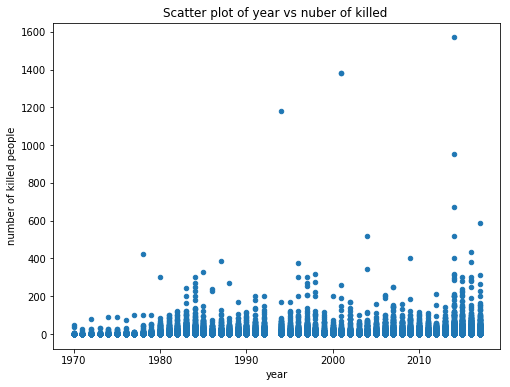

In [13]:
fig = plt.figure(figsize=(8,6))
ax =fig.gca()
mydata.plot(kind='scatter' , x= 'iyear' , y= 'nkill' , ax = ax)
ax.set_title('Scatter plot of year vs nuber of killed ')
ax.set_xlabel('year')
ax.set_ylabel('number of killed people')


In [14]:
counts = mydata['country_txt'].value_counts()
counts

Iraq                              24636
Pakistan                          14368
Afghanistan                       12731
India                             11960
Colombia                           8306
Philippines                        6908
Peru                               6096
El Salvador                        5320
United Kingdom                     5235
Turkey                             4292
Somalia                            4142
Nigeria                            3907
Thailand                           3849
Yemen                              3347
Spain                              3249
Sri Lanka                          3022
United States                      2836
Algeria                            2743
France                             2693
Egypt                              2479
Lebanon                            2478
Chile                              2365
Libya                              2249
West Bank and Gaza Strip           2227
Syria                              2201


Text(0, 0.5, 'number incedent')

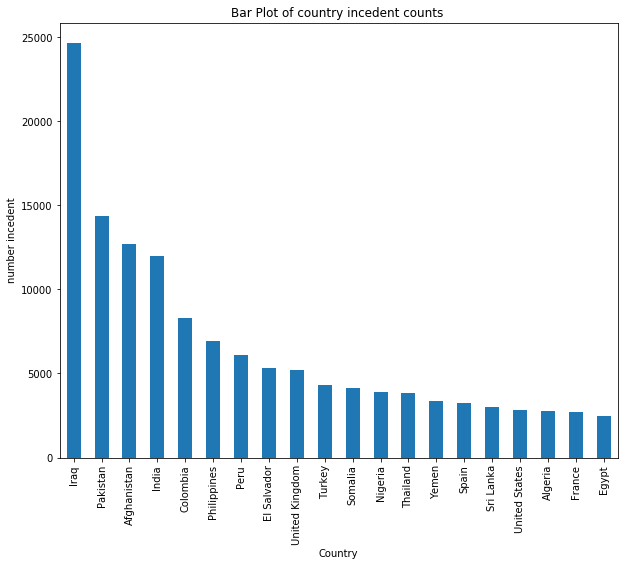

In [99]:
#Bar plot
counts = mydata['country_txt'].value_counts()
fig = plt.figure(figsize=(10,8))
ax =fig.gca()
counts[0:20].plot.bar(ax = ax)
ax.set_title('Bar Plot of country incedent counts ')
ax.set_xlabel('Country')
ax.set_ylabel('number incedent')



Text(0, 0.5, 'number incedent')

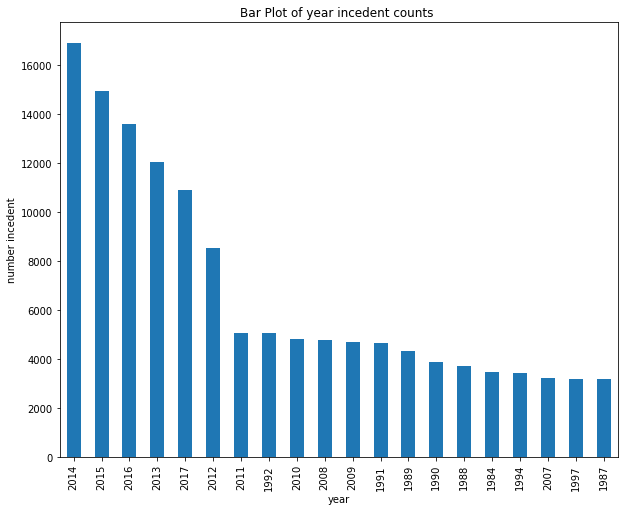

In [100]:
#Bar plot (for discrte/ categoral  data)
counts = mydata['iyear'].value_counts()
fig = plt.figure(figsize=(10,8))
ax =fig.gca()
counts[0:20].plot.bar(ax = ax)
ax.set_title('Bar Plot of year incedent counts ')
ax.set_xlabel('year')
ax.set_ylabel('number incedent')

Text(0, 0.5, 'number')

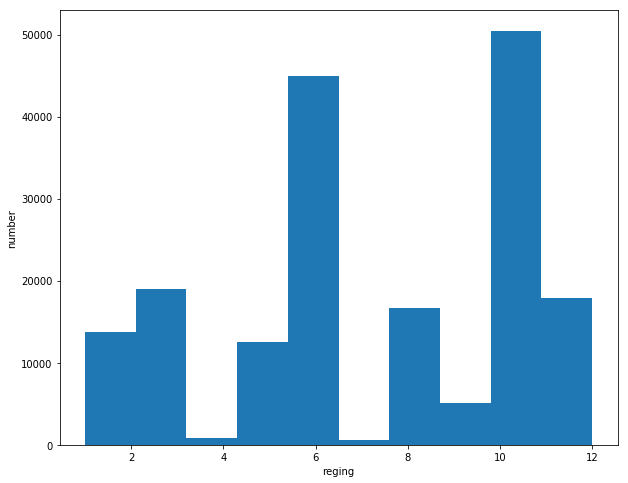

In [101]:
#Histogram (for continues /numeric data)
fig = plt.figure(figsize=(10,8))
ax =fig.gca()
mydata['region'].plot.hist(ax=ax)
ax.set_xlabel('reging')
ax.set_ylabel('number')



In [ ]:
#box plot



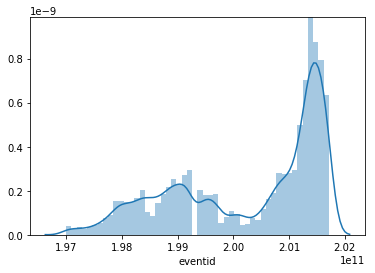

In [18]:
sns.distplot(mydata['eventid'])

In [19]:
print("Skewness: %f" % mydata['eventid'].skew())
print("Kurtosis: %f" % mydata['eventid'].kurt())

Skewness: -0.619155
Kurtosis: -1.042982


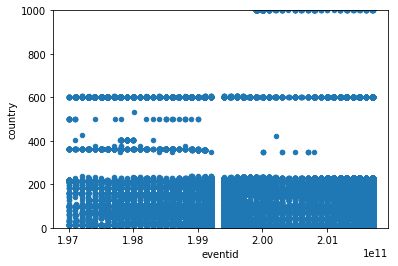

In [20]:
#relationship numerical features (scatter plot)
var = 'eventid'
data = pd.concat([mydata['country'], mydata[var]], axis=1)
data.plot.scatter(x=var, y='country' , ylim=(0,1000))

(array([1960., 1970., 1980., 1990., 2000., 2010., 2020.]),
 <a list of 7 Text xticklabel objects>)

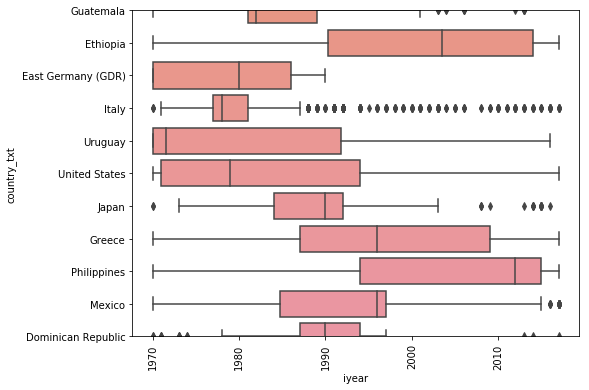

In [21]:
#relationship categorical features and outliers (boxplot)
var = 'iyear'
data = pd.concat([mydata['country_txt'], mydata[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="country_txt", data=data)
fig.axis(ymin=0, ymax=10)
plt.xticks(rotation=90)


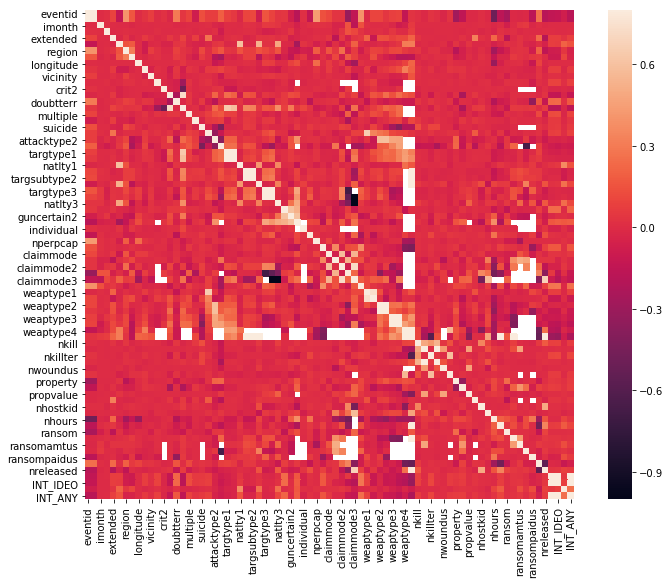

In [22]:
#correlation matrix
corrmat = mydata.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

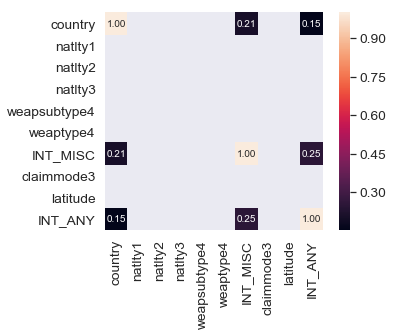

In [23]:
#correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'country')['country'].index
cm = np.corrcoef(mydata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

C:\Users\emil\Anaconda3\envs\emil2019\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


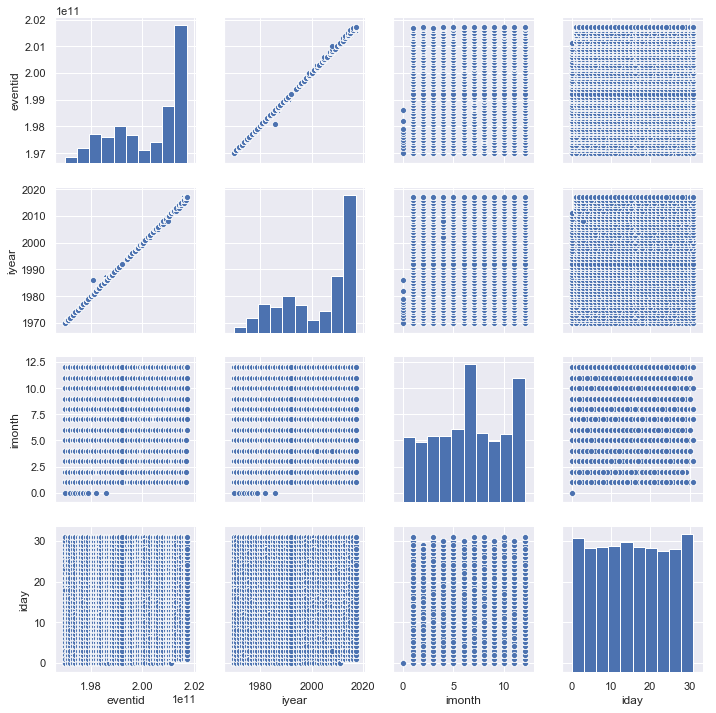

In [24]:
sns.set()
cols = ['eventid', 'iyear', 'imonth', 'iday']
sns.pairplot(mydata[cols], size = 2.5)
plt.show();

Text(0.5, 1.0, 'Terroist attacks with lesser than 100 killed')

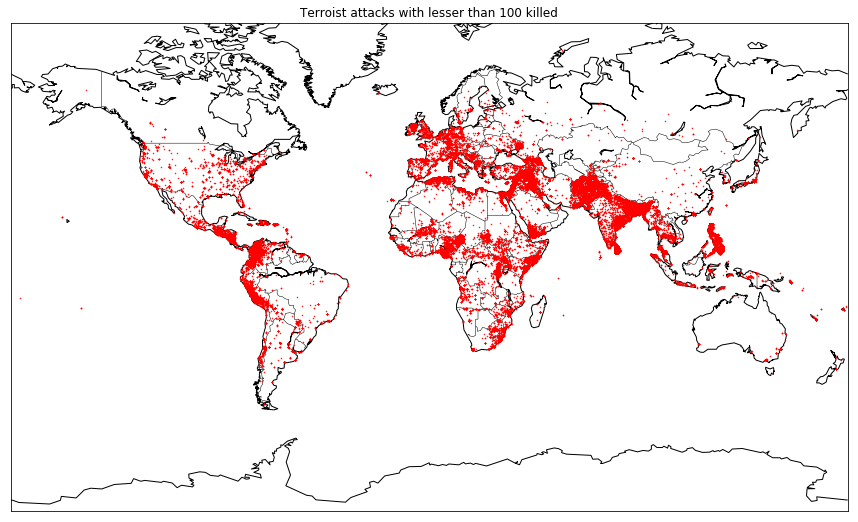

In [25]:
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180)
lat_100=list(mydata[mydata['nkill'] <100].latitude)
long_100=list(mydata[mydata['nkill']<100].longitude)
x_100,y_100=m3(long_100, lat_100)
m3.drawcoastlines()
m3.drawcountries()
m3.plot(x_100, y_100,'go',markersize=0.5,color = 'r')
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("Terroist attacks with lesser than 100 killed")

Text(0.5, 1.0, 'Terroist attacks with lesser than 100 nwounded')

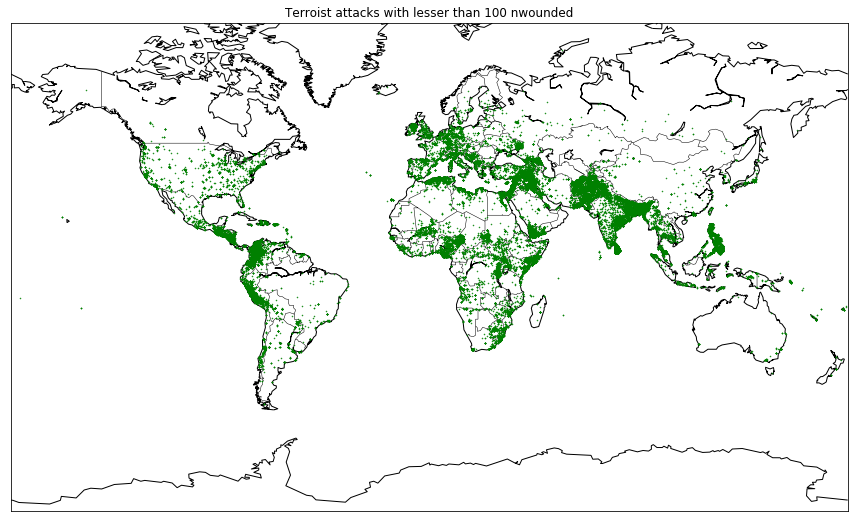

In [24]:
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180)
lat_100=list(mydata[mydata['nwound'] <100].latitude)
long_100=list(mydata[mydata['nwound']<100].longitude)
x_100,y_100=m3(long_100, lat_100)
m3.drawcoastlines()
m3.drawcountries()
m3.plot(x_100, y_100,'go',markersize=0.5,color = 'g')
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("Terroist attacks with lesser than 100 nwounded")